# PRASUNET Internship

# TASK-05

Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

# Dataset Description:

• The dataset used for this analysis contains information about traffic accidents in the United States. 

• It includes details such as accident severity, location coordinates, time of occurrence, weather conditions, visibility, temperature, and other related factors. 

• The dataset provides a comprehensive view of various aspects that contribute to traffic accidents, allowing for detailed analysis and insights into patterns related to road safety and accident prevention strategies.

# Import Librires

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load and Inspect the Data

In [2]:
df = pd.read_csv('D:/Internship/Prasunet/Task 5/US_Accidents_March23.csv')
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (3554549, 51)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554549 entries, 3402762 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  object        
 15  Zipcode                object        
 16  Country                object        
 17  Timezone               object 

# Data Preprocessing and Feature Engineering

In [15]:
# Convert Start_Time and End_Time to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [30]:
# Create new features for analysis
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek  

In [31]:
# Filter columns of interest
columns_of_interest = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 
                       'Temperature(F)', 'Wind_Speed(mph)', 'Weather_Condition', 
                       'Visibility(mi)', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']
df = df[columns_of_interest]

In [32]:
# Drop rows with missing values in columns of interest
df.dropna(subset=['Severity', 'Weather_Condition', 'Visibility(mi)'], inplace=True)

•  Start_Time and End_Time are converted to datetime format, enabling time-based analysis.

•  New features (Year, Month, Day, Hour, DayOfWeek) are derived from Start_Time to facilitate temporal analysis.

•  Columns of interest are filtered and missing values in critical columns (Severity, Weather_Condition, Visibility(mi)) are dropped to ensure data quality for subsequent analysis.

# Exploratory Data Analysis (EDA)

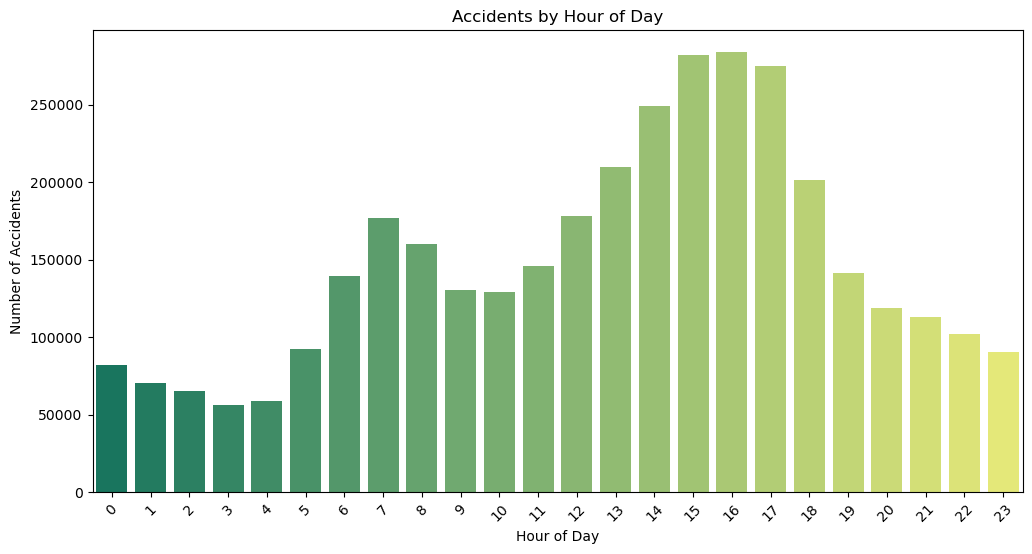

In [72]:
# 1. Accidents by Time of Day
df['Hour'] = df['Start_Time'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='summer')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

The plot showed that accidents peak during certain hours of the day, typically around morning rush hours and late afternoon. This suggests higher traffic volumes during these times, potentially contributing to increased accident rates.

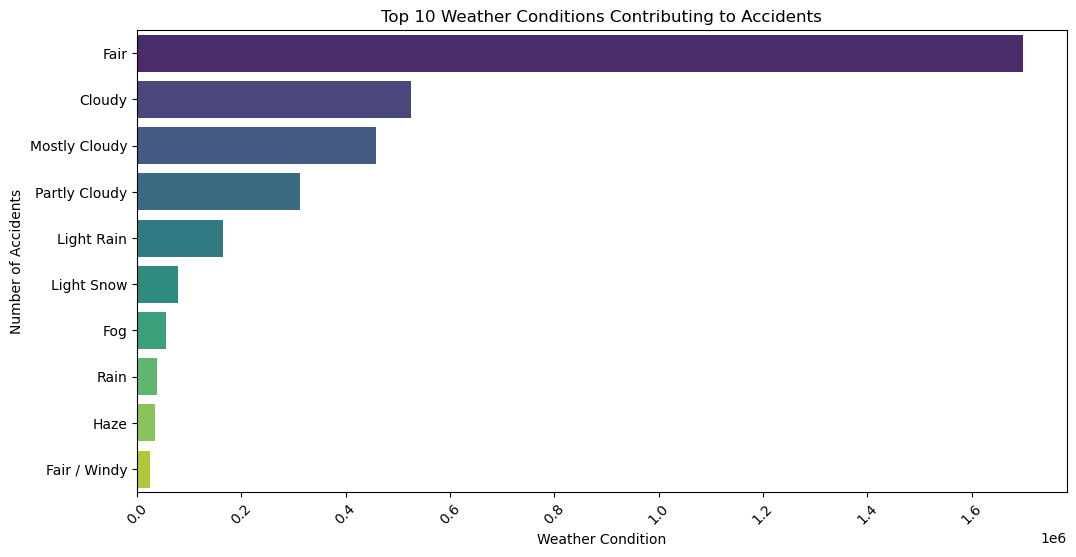

In [70]:
# 2. Accidents by Weather Condition
plt.figure(figsize=(12, 6))
weather_counts = df['Weather_Condition'].value_counts().head(10)
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Weather Conditions Contributing to Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Weather conditions such as clear, cloudy, and rainy were among the top contributors to accidents. Rainy and foggy conditions were notably associated with higher accident frequencies, indicating reduced visibility as a significant factor.


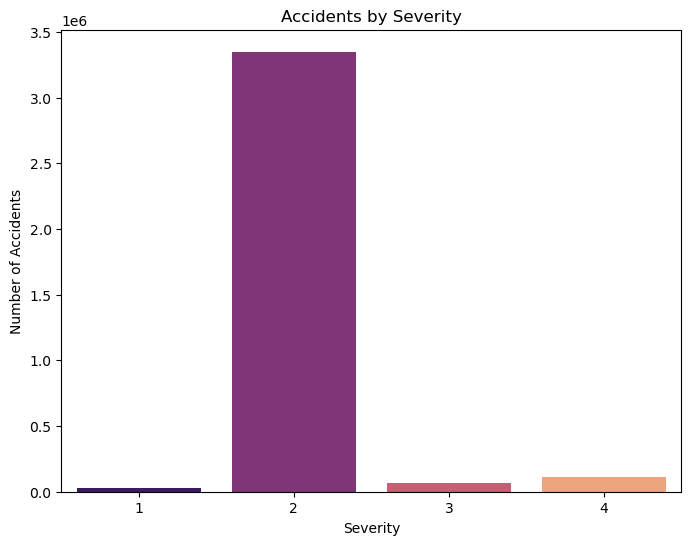

In [78]:
# 3. Accidents by Severity
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Severity', palette='magma')
plt.title('Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()

The count plot of accident severity levels indicated that most accidents recorded were of lower severity (e.g., 2 or 3 on a severity scale). However, severe accidents (severity level 4) also occurred, highlighting the importance of understanding factors contributing to high severity incidents.

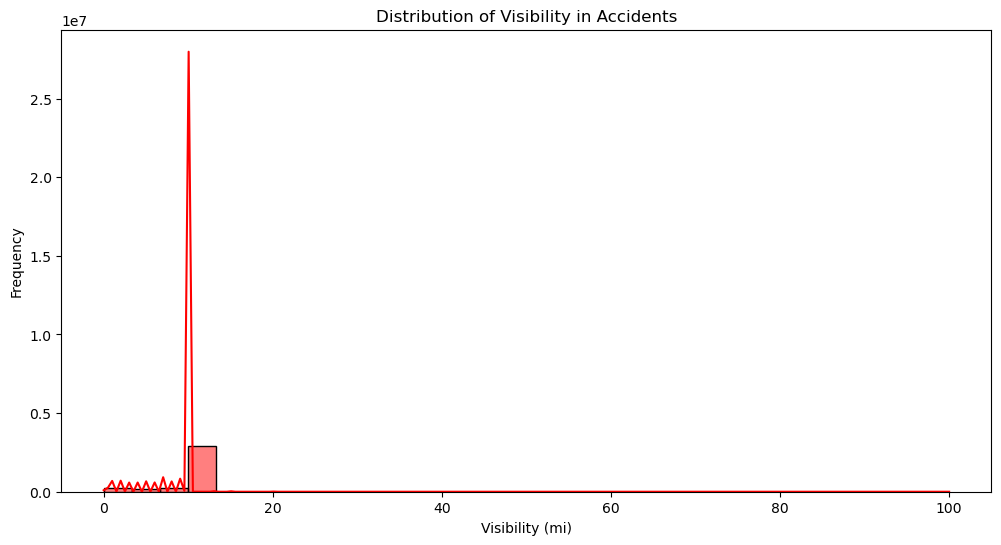

In [73]:
# 4. Accidents by Visibility
plt.figure(figsize=(12, 6))
sns.histplot(df['Visibility(mi)'], bins=30, kde=True, color='red')
plt.title('Distribution of Visibility in Accidents')
plt.xlabel('Visibility (mi)')
plt.ylabel('Frequency')
plt.show()

The visibility histogram revealed that accidents frequently occurred in conditions with moderate visibility, suggesting a critical role of visibility in accident occurrence.

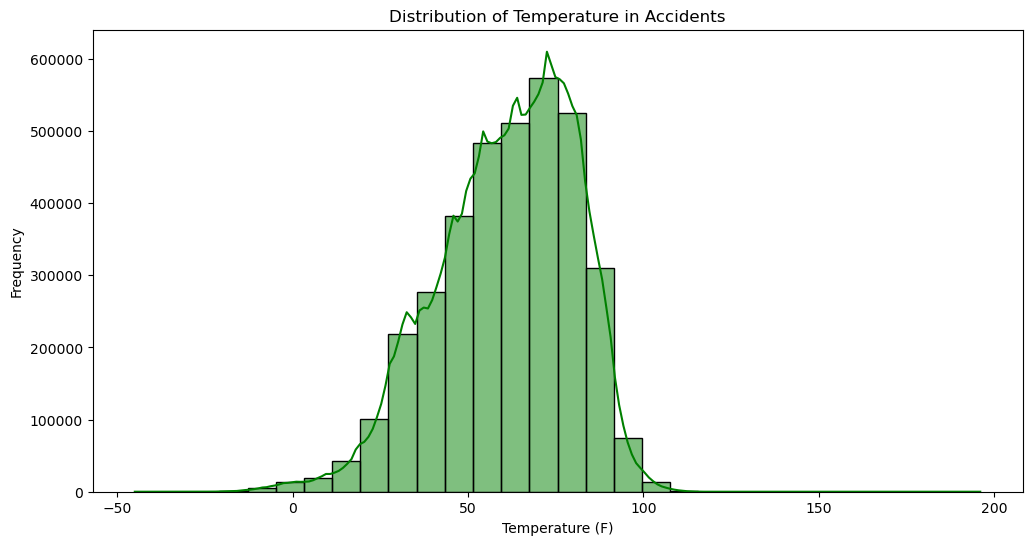

In [75]:
# 5The visibility histogram revealed that accidents frequently occurred in conditions with moderate visibility, suggesting a critical role of visibility in accident occurrence.. Accidents by Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature(F)'], bins=30, kde=True, color='green')
plt.title('Distribution of Temperature in Accidents')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

The temperature distribution showed a typical pattern with accidents occurring across a range of temperatures, without a distinct peak, indicating temperature alone might not be a primary factor influencing accident rates.

# Visualization of Accident Hotspots

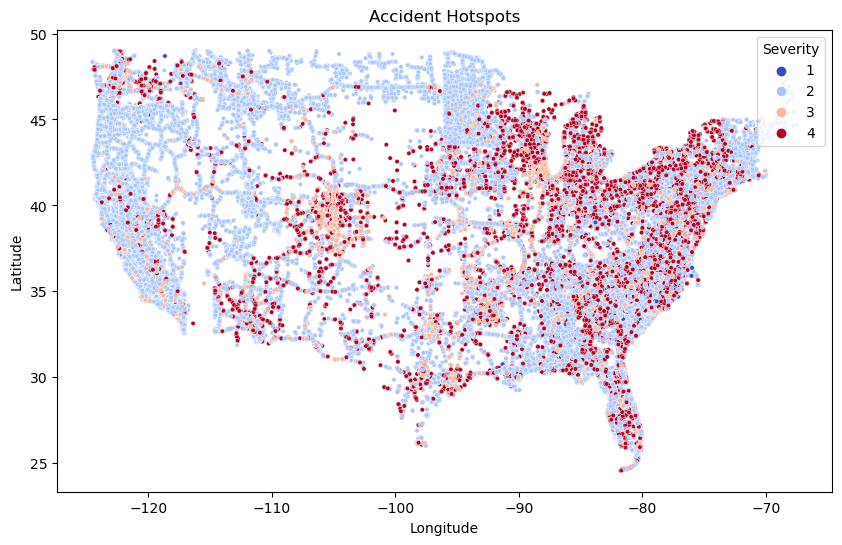

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='Severity', palette='coolwarm', s=10)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity', loc='upper right')
plt.show()

The scatter plot of accident hotspots based on geographical coordinates highlighted areas with higher accident frequencies and varying severity levels. This spatial visualization helps identify regions requiring more attention for safety measures or infrastructure improvements.

### 	Key Factors Contributing to Accidents: 
The analysis identified several critical factors influencing accident rates, including weather conditions (especially visibility), time of day, and geographical locations.

# Conclusion:

•	Insights into peak accident times and hotspots can guide efforts to improve road safety measures, enhance emergency response strategies, and implement targeted traffic management interventions.

•	Utilizing data analytics and visualization tools provides actionable insights for policymakers, urban planners, and law enforcement agencies to prioritize resources effectively and reduce accident rates.